# Data Introduction:

This is the Tree Dataset that we chose for our project. It predicts forest cover types which is our target variable from cartographic variables such as elevation features, slopes, horizontal/vertical distance to water sources, hillshades, and distance to fire points.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [4]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

df_combined = X.copy()
df_combined['Cover_Type'] = y['Cover_Type']

# metadata
print(covertype.metadata)

# variable information
print(covertype.variables)

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

44 variables and 1 target variable (`Cover_Type`). All variables are integer data types. for ease of interpretation we may consider changing `Cover_Type` to categories as described in the repository.

In [ ]:
# basic data dimensions
print("No. of Observations:", df_combined.shape[0])
print("No. of Features:", df_combined.shape[1])

No. of Observations: 581012
No. of Features: 55


Working with 581012 observations.

In [5]:
# mapping Cover_Type to more descriptive categories.
cover_type_map = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz"
}

df_combined["Cover_Type"] = df_combined["Cover_Type"].map(cover_type_map)
y["Cover_Type"] = y["Cover_Type"].map(cover_type_map)

/tmp/ipython-input-2468093151.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Cover_Type"] = y["Cover_Type"].map(cover_type_map)


## Investigations of Missing Values
*None were detected.*

In [ ]:
print("Missing values in X:")
display(X.isnull().sum())

print("\nMissing values in y:")
display(y.isnull().sum())

Missing values in X:


,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0



Missing values in y:


,0
Cover_Type,0


In [ ]:
# we have 7 unique data targets
np.unique(y)

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
# we display the number of unique values in each predictor.
display(X.nunique())

,0
Elevation,1978
Aspect,361
Slope,67
Horizontal_Distance_To_Hydrology,551
Vertical_Distance_To_Hydrology,700
Horizontal_Distance_To_Roadways,5785
Hillshade_9am,207
Hillshade_Noon,185
Hillshade_3pm,255
Horizontal_Distance_To_Fire_Points,5827


The variables include elevation, aspect, slope, distance to hydrology, hillshade at different times, distance to fire points, if it is a wilderness area, and the soil type. There are no missing values in the dataset. This is good because we can jump into EDA. All of the categorical variables are already one-hot encoded, which is good for prediction.

Features that begin with `Soil_Type` or `Wilderness_Area` only have 2 unique values so they are binary features.

### Introducing Something Fishy


This project was completed together with Nathan Chen, Jessica Yao, Dae Hoon Chung, Angelina Yang, and Huy Nguyen. (Attached below is our group mascot)

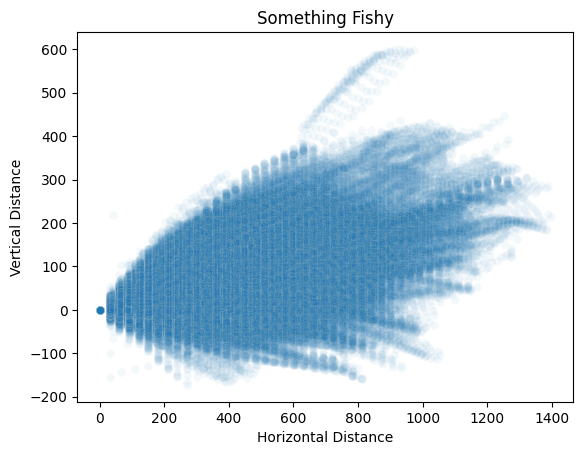

In [13]:
# plot horizontal vs vertical distance to hydrology
sns.scatterplot(data = df_combined, x = 'Horizontal_Distance_To_Hydrology', y = 'Vertical_Distance_To_Hydrology', alpha = 0.05)
plt.title('Something Fishy')
plt.xlabel('Horizontal Distance')
plt.ylabel('Vertical Distance')
plt.show()

## Exploratory Data Analysis

In [ ]:
# a quick look at the structure of the data
df_combined.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


To start, we are going to use all the available variables. This will give us the most data to work with to predict the tree cover type.

In [ ]:
X.dtypes

,0
Elevation,int64
Aspect,int64
Slope,int64
Horizontal_Distance_To_Hydrology,int64
Vertical_Distance_To_Hydrology,int64
Horizontal_Distance_To_Roadways,int64
Hillshade_9am,int64
Hillshade_Noon,int64
Hillshade_3pm,int64
Horizontal_Distance_To_Fire_Points,int64


All variable datatypes are int64.

In [ ]:
X[X.columns[:10]].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


Summary statistics for the first 10 columns (not the binary variables) are shown above.

### Correlation Matrix

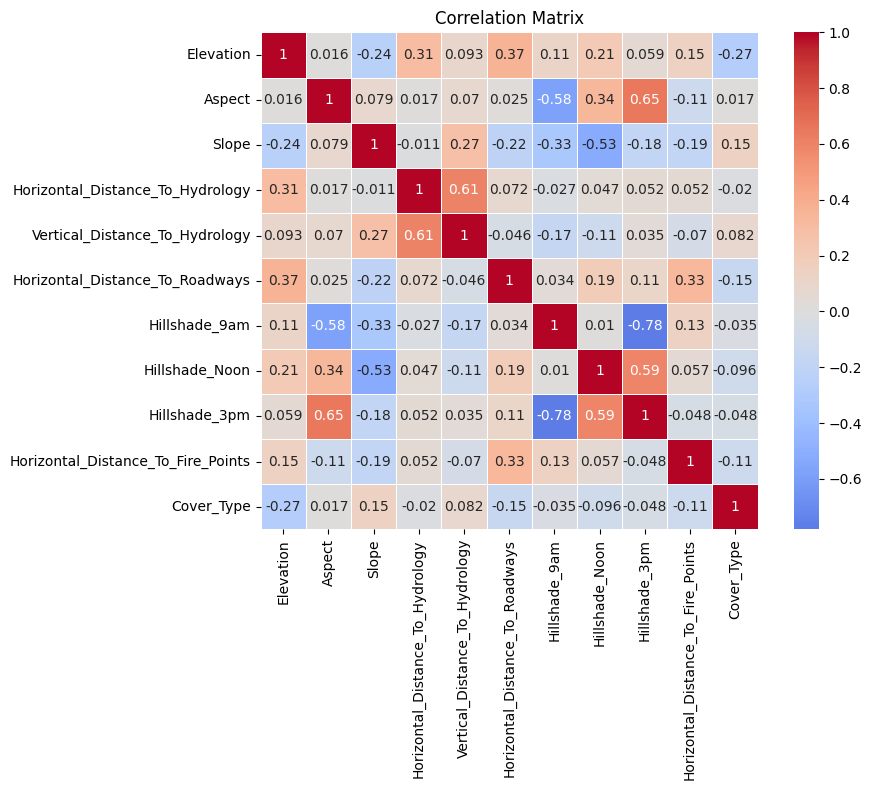

In [ ]:
# correlation matrix of numeric columns

numeric_cols = [col for col in df_combined if not df_combined[col].isin([0, 1]).all()]
corr_matrix = df_combined[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center = 0, square = True, linewidths = 0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

`Hillshade_3pm` and `Aspect` are moderately positively correlated, followed by `Hillshade_Noon` and `Hillshade_3pm`. `Hillshade_3pm` and `Hillshade_9pm` are strongly negatively correlated, followed by `Hillshade_9am` and `Aspect` and `Hillshade_Noon` and `Slope`.

### Boxplots

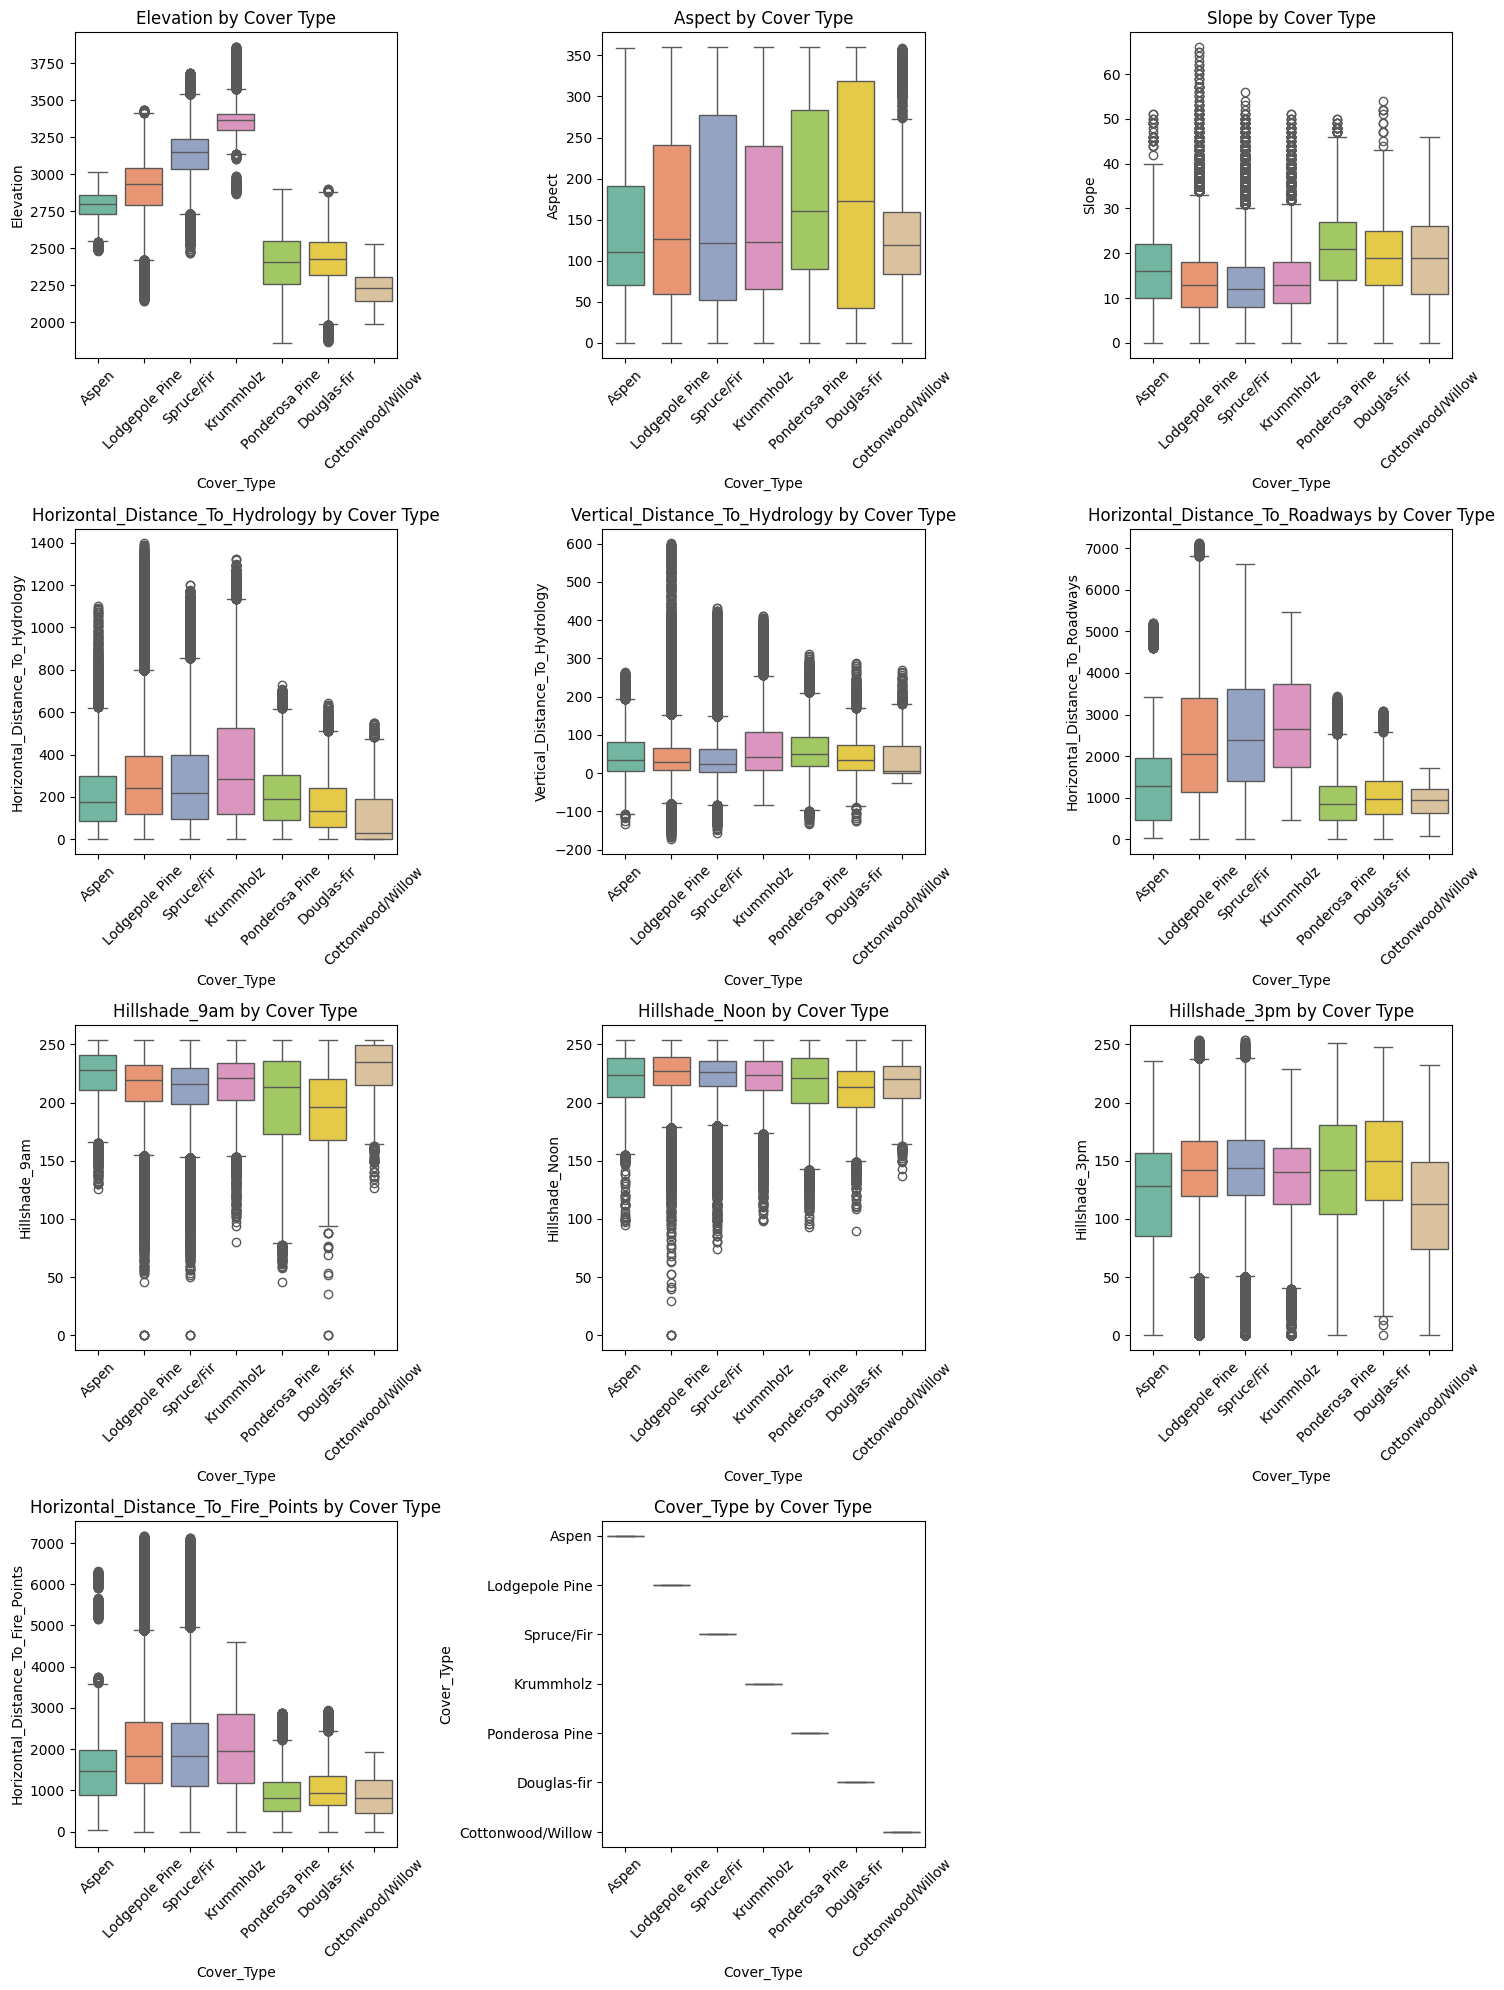

In [ ]:
# use numeric_cols from above.
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data = df_combined, x = 'Cover_Type', y = col,
                ax = axes[i // 3, i % 3],
                palette = sns.color_palette("Set2", 7),
                hue = "Cover_Type",
                legend = False)
    axes[i // 3, i % 3].set_title(f'{col} by Cover Type')
    axes[i // 3, i % 3].tick_params(axis='x', labelrotation=45)

# we have one empty subplot so we hide it
axes[-1, -1].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
for column in X[X.columns[:10]]:
    print(X[column].values)

[2596 2590 2804 ... 2386 2384 2383]
[ 51  56 139 ... 159 170 165]
[ 3  2  9 ... 17 15 13]
[258 212 268 ...  60  60  60]
[ 0 -6 65 ...  7  5  4]
[ 510  390 3180 ...   90   90   67]
[221 220 234 ... 236 230 231]
[232 235 238 ... 241 245 244]
[148 151 135 ... 130 143 141]
[6279 6225 6121 ...  854  864  875]


Looking at the boxplots for the continuous variables, we believe that IQR is not a suitable measure for outliers. There are many data points that lie outside the 1.5IQR range. We will consider the outliers in our model.

Plotting Elevations against Cover Types, we can observe the quartile ranges in Elevation and other features that are characteristic of different Cover Types. Something to note is that most ranges contain some form of overlap between multiple Cover Types. For example, we observe that based on this diagram, features like horizontal or vertical distance to hydrology are unlikely to be helpful in distinguishing Cover Types.

### Histograms

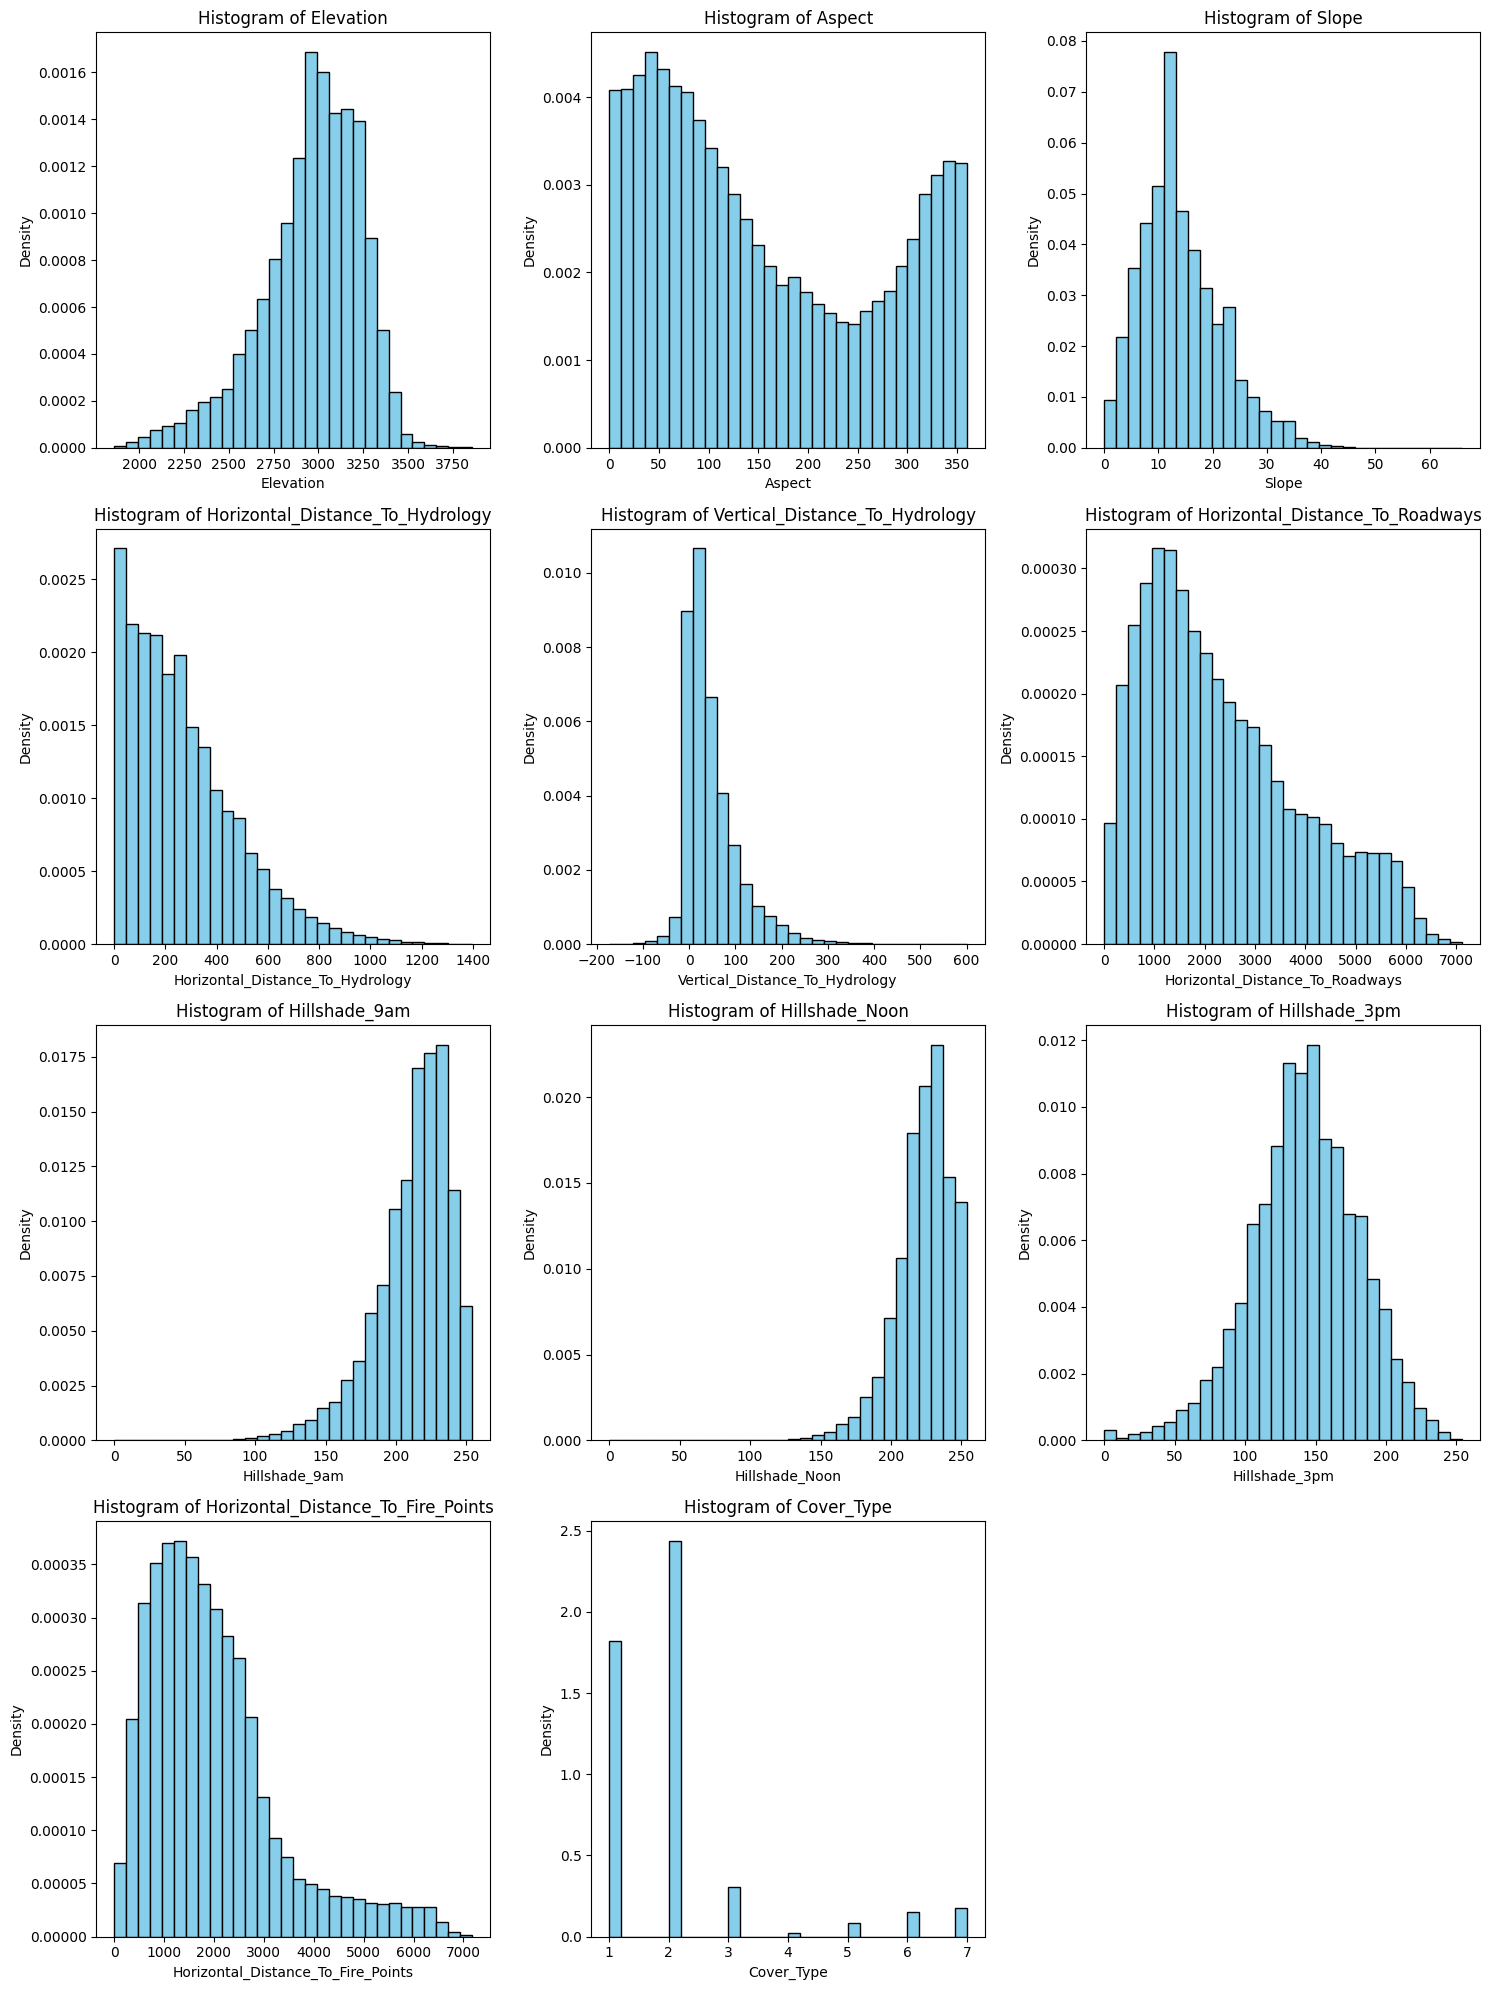

In [ ]:
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
  axes[i].hist(df_combined[col], bins = 30, color = 'skyblue', edgecolor = 'black', density = True)
  axes[i].set_title(f'Histogram of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Density')

# we have one empty subplot so we hide it
axes[11].set_visible(False)

plt.tight_layout()
plt.show()

Some data is skewed, so we may need to consider log-transforming the data if it makes the model more effective.

## Class Balance

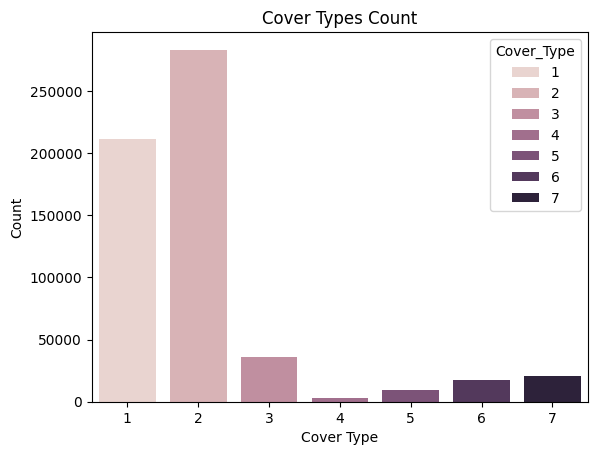

In [ ]:
sns.countplot(x='Cover_Type', data=y, hue = 'Cover_Type')
plt.title('Cover Types Count')
plt.xlabel('Cover Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.show()

The most common target is cover type 2, and the least common is cover type 4, which has much less than the rest of the outcomes.

### Imbalanced Soil Data

In [ ]:
for col in df_combined.loc[:, 'Wilderness_Area1':'Soil_Type40']:
    print(df_combined[col].value_counts())

Wilderness_Area1
0    320216
1    260796
Name: count, dtype: int64
Soil_Type1
0    577981
1      3031
Name: count, dtype: int64
Soil_Type2
0    573487
1      7525
Name: count, dtype: int64
Soil_Type3
0    576189
1      4823
Name: count, dtype: int64
Soil_Type4
0    568616
1     12396
Name: count, dtype: int64
Soil_Type5
0    579415
1      1597
Name: count, dtype: int64
Soil_Type6
0    574437
1      6575
Name: count, dtype: int64
Soil_Type7
0    580907
1       105
Name: count, dtype: int64
Soil_Type8
0    580833
1       179
Name: count, dtype: int64
Soil_Type9
0    579865
1      1147
Name: count, dtype: int64
Soil_Type10
0    548378
1     32634
Name: count, dtype: int64
Soil_Type11
0    568602
1     12410
Name: count, dtype: int64
Soil_Type12
0    551041
1     29971
Name: count, dtype: int64
Soil_Type13
0    563581
1     17431
Name: count, dtype: int64
Soil_Type14
0    580413
1       599
Name: count, dtype: int64
Soil_Type15
0    581009
1         3
Name: count, dtype: int64
Soil_Type16


There are some soil types that have very few counts.

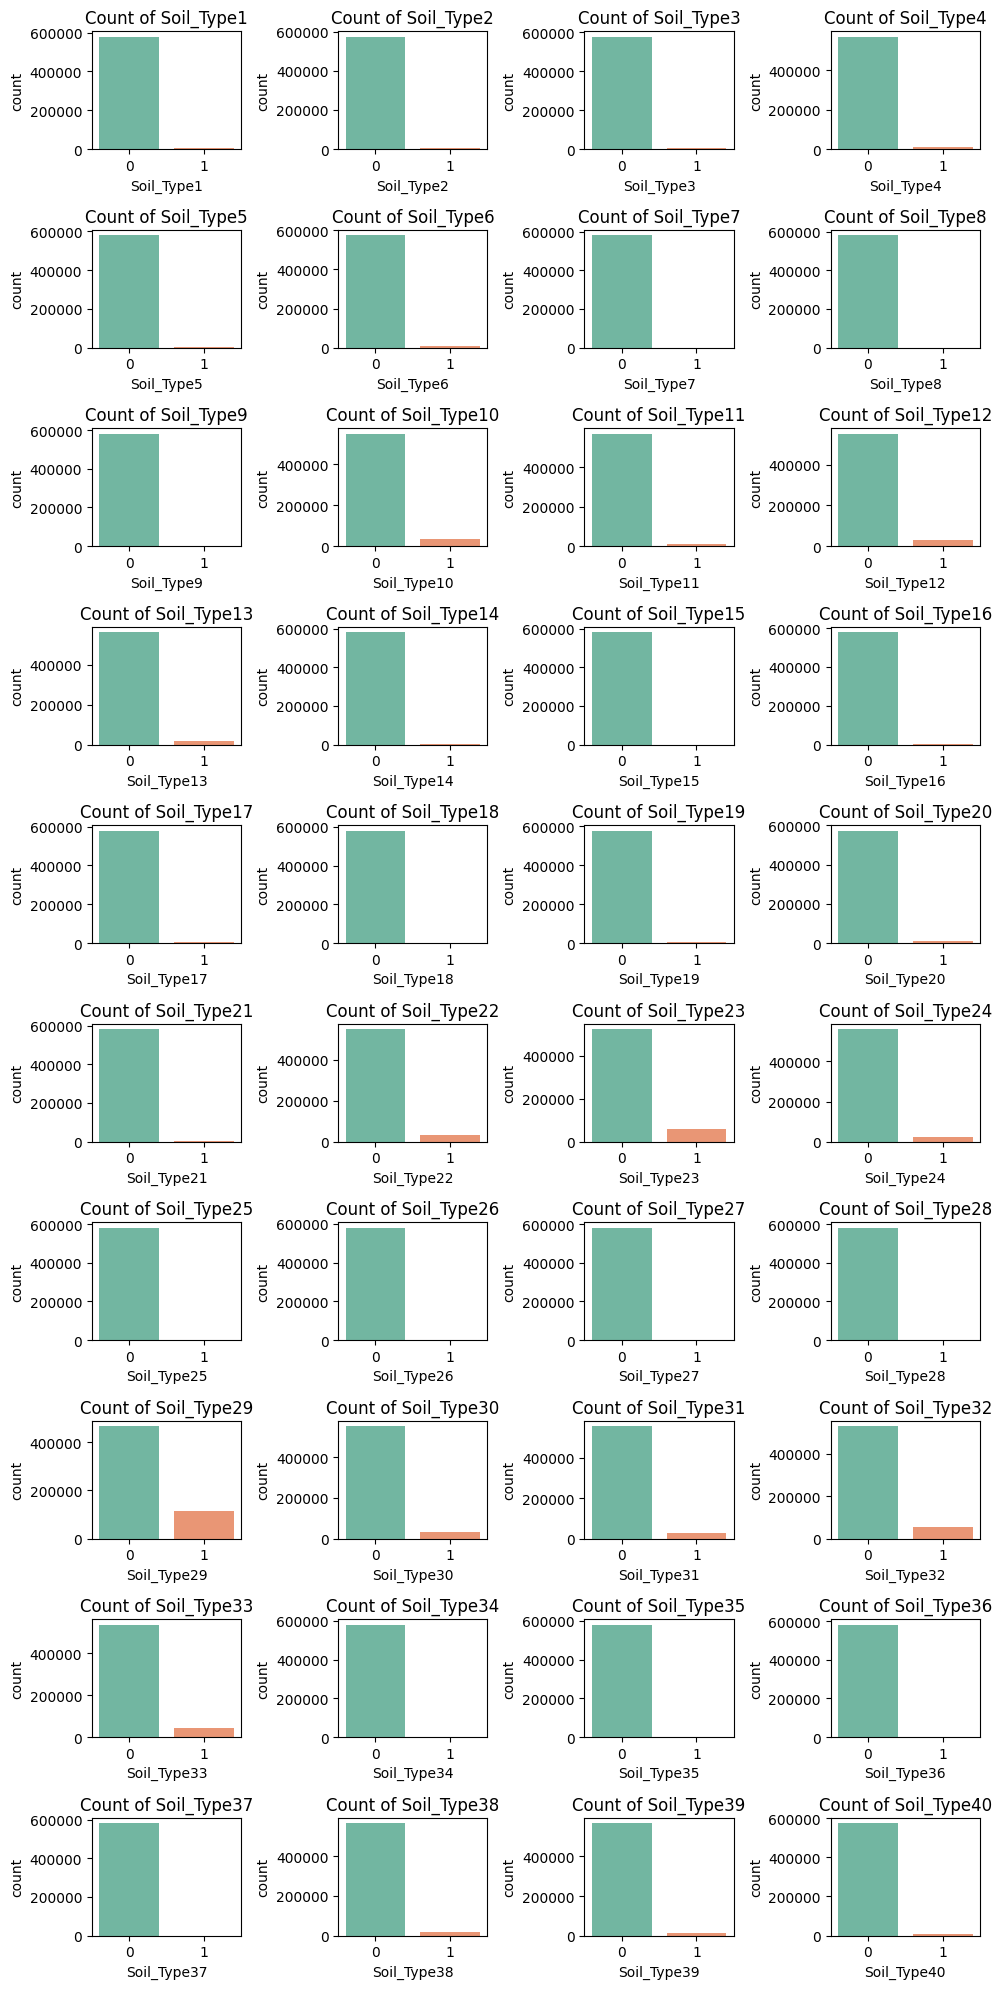

In [ ]:
## 44 binary features (wilderness_areas and soil_types)
fig, axes = plt.subplots(10, 4, figsize=(10,20))
axes = axes.flatten()

soil_types = [col for col in df_combined if col.startswith('Soil_Type')]
for i, col in enumerate(soil_types):
  sns.countplot(x=col, data=df_combined, ax=axes[i], hue = col, palette = "Set2", legend = False)
  axes[i].set_title(f'Count of {col}')

plt.tight_layout()
plt.show()


**All** Soil_Types have a very uneven balance of presence/non-presence and are very sparse. For most soil types, 0 appears hundreds of thousands of times but 1 appears only a few thousand times.

### Wilderness Areas

Text(0.5, 1.0, '')

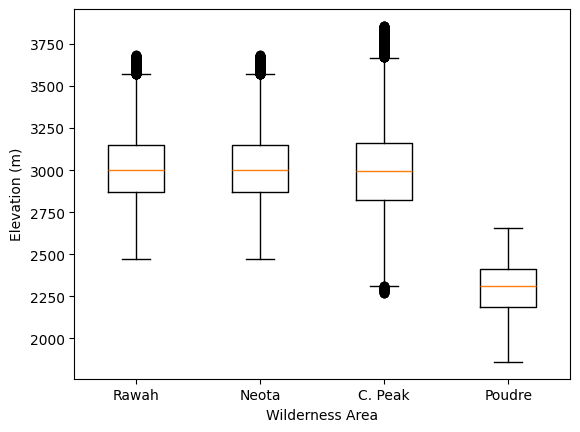

In [ ]:
# See relevant distribution of different wilderness areas
# Rawah: Area 1
# Neota: Area 2
# Comanche Peak: Area 3 (Abbr. as C. Peak)
# Cache la Poudre: Area 4 (Abbr as Poudre)

rawah_idx = X["Wilderness_Area1"] == 1
X_rawah = X[rawah_idx]
y_rawah = y[rawah_idx]

neota_idx = X["Wilderness_Area2"] == 1
X_neota = X[rawah_idx]
y_neota = y[rawah_idx]

c_peak_idx = X["Wilderness_Area3"] == 1
X_c_peak = X[c_peak_idx]
y_c_peak = y[c_peak_idx]

poudre_idx = X["Wilderness_Area4"] == 1
X_poudre = X[poudre_idx]
y_poudre = y[poudre_idx]


fig, ax = plt.subplots()
ax.boxplot([X_rawah["Elevation"], X_neota["Elevation"], X_c_peak["Elevation"], X_poudre["Elevation"]], tick_labels = ["Rawah", "Neota", "C. Peak", "Poudre"])
ax.set_xlabel("Wilderness Area")
ax.set_ylabel("Elevation (m)")
ax.set_title("")

We note that most sites have about the same height, except for Poudre with a lower range of elevation. Maybe a possible correlation for trees at Poudre with water distance?

Text(0.5, 1.0, 'Cache la Poudre')

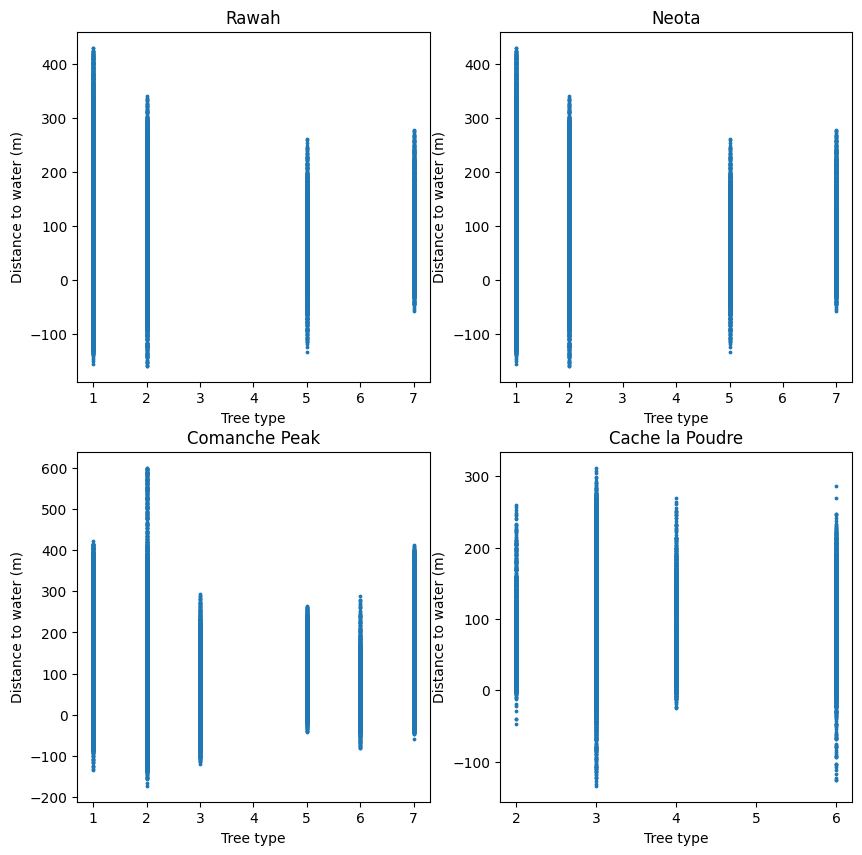

In [ ]:
# Plot 2: Plot the distribution to water for each plant type, per site

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

ax[0, 0].scatter(y_rawah, X_rawah["Vertical_Distance_To_Hydrology"], s = 3)
ax[0, 0].set_xlabel("Tree type")
ax[0, 0].set_ylabel("Distance to water (m)")
ax[0, 0].set_title("Rawah")
ax[0, 1].scatter(y_neota, X_neota["Vertical_Distance_To_Hydrology"], s = 3)
ax[0, 1].set_xlabel("Tree type")
ax[0, 1].set_ylabel("Distance to water (m)")
ax[0, 1].set_title("Neota")
ax[1, 0].scatter(y_c_peak, X_c_peak["Vertical_Distance_To_Hydrology"], s = 3)
ax[1, 0].set_xlabel("Tree type")
ax[1, 0].set_ylabel("Distance to water (m)")
ax[1, 0].set_title("Comanche Peak")
ax[1, 1].scatter(y_poudre, X_poudre["Vertical_Distance_To_Hydrology"], s = 3)
ax[1, 1].set_xlabel("Tree type")
ax[1, 1].set_ylabel("Distance to water (m)")
ax[1, 1].set_title("Cache la Poudre")

Trees 3 and 6 are unique to Comanche Peak, and tree 4 is unique to Cache la Poudre.

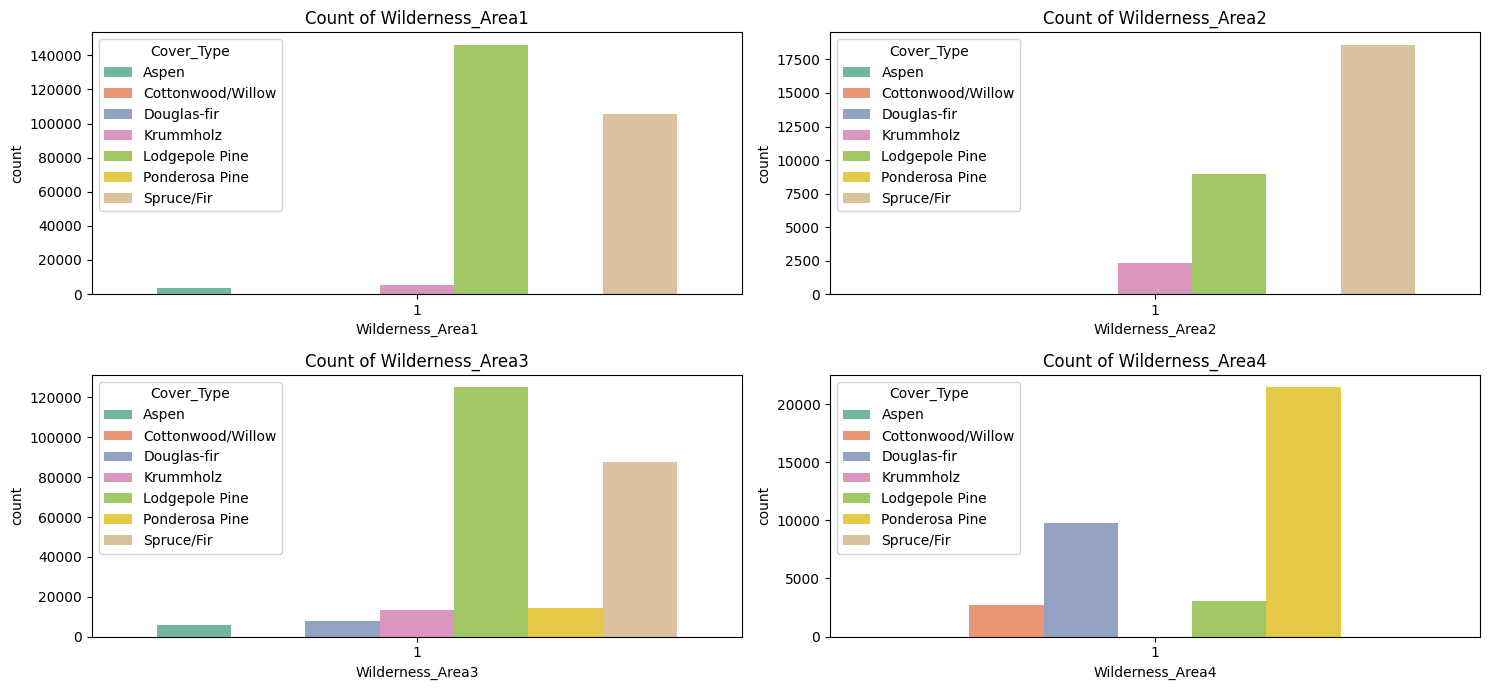

In [ ]:
## 44 binary features (here is wilderness_areas)
cover_order = sorted(df_combined["Cover_Type"].unique())
fig, axes = plt.subplots(2, 2, figsize=(15, 7))
axes = axes.flatten()

wild_types = [col for col in df_combined if col.startswith('Wilderness_Area')]
for i, col in enumerate(wild_types):
  sns.countplot(x=col, data=df_combined[df_combined[col] == 1], ax=axes[i], hue = "Cover_Type", hue_order = cover_order, palette = "Set2")
  axes[i].set_title(f'Count of {col}')

plt.tight_layout()
plt.show()

These plots sho the count of certain cover types that appear in the presence of each wilderness area. It seems that wilderness area has a strong effect on the possible cover types that appear. This could be significant for many types of models.